# Professor Proposes

### Executive summary

A professor of machine learning plans to tie the knot with his longtime partner. This is his first time shopping for diamonds. While browsing the mall, he came across a dizzying array of diamond qualities, configurations, and prices. Based on his quick search, he found that diamonds are primarily characterized by 4C: cut, colour, clarity, and carat besides Polish, Symmetry, and certification. In order to avoid getting cheated while purchasing the diamond ring, he ran a web scrape of three different wholesaler websites to compile his pricing model. Estimate the price of a diamond ring of his choice using a Linear Regression Model.

Issues and challenges: 

* Identify Determinants of Price
* Distribution of data
* Univariate Analysis of characteristics of diamonds 
* Finding the Correlation, Covariance between price and all the characteristics of diamonds 
* Creating a regression model to predict the price of a diamond ring 

As 4Cs are the best determinants of the quality of a diamond, the professor needs to run the analysis focusing on 4Cs and other important characteristics such as Polish and certification. 

Professor’s Diamond Ring
Price - $3100

Carat - 0.9

Cut - Very Good

Color - J

Clarity - S12

Polish - Good

Symmetry - Very Good

Certification - GIA


In [1]:
import pandas as pd

In [2]:
dataset_professor_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/professor_proposes/data/data.csv")
dataset_professor = dataset_professor_raw.copy()

Removing the dollar symbol and comma from the price.

In [3]:
datset_replace_dollar = dataset_professor["Price"].copy()
datset_replace_dollar = datset_replace_dollar.str.replace('$', '',regex=True)
datset_replace_dollar = datset_replace_dollar.str.replace(',', '',regex=True)
datset_replace_dollar = pd.to_numeric(datset_replace_dollar)
dataset_professor["Price_updated"] = datset_replace_dollar
dataset_professor.head(5)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,Price_updated
0,0.92,I,SI2,G,AGS,V,V,"$3,000",1.0,3000.0
1,0.92,I,SI2,V,AGS,G,G,"$3,000",1.0,3000.0
2,0.82,F,SI2,I,GIA,X,X,"$3,004",1.0,3004.0
3,0.81,G,SI1,I,GIA,X,V,"$3,004",1.0,3004.0
4,0.90,J,VS2,V,GIA,V,V,"$3,006",1.0,3006.0


In [4]:
Wholesaler_type_change = pd.Series(dataset_professor["Wholesaler"], dtype="Int64")
Wholesaler_type_change = pd.to_numeric(Wholesaler_type_change, downcast="integer")
Wholesaler_type_change = Wholesaler_type_change.astype(str)
dataset_professor["Wholesaler"] = Wholesaler_type_change


In [5]:
dataset_professor = dataset_professor.drop(columns=['Price'])
dataset_professor.head(5)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Wholesaler,Price_updated
0,0.92,I,SI2,G,AGS,V,V,1,3000.0
1,0.92,I,SI2,V,AGS,G,G,1,3000.0
2,0.82,F,SI2,I,GIA,X,X,1,3004.0
3,0.81,G,SI1,I,GIA,X,V,1,3004.0
4,0.90,J,VS2,V,GIA,V,V,1,3006.0


### Exploratory Data Analysis

In [6]:
dataset_professor.shape

(441, 9)

In [7]:
dataset_professor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Carat          440 non-null    float64
 1   Colour         440 non-null    object 
 2   Clarity        440 non-null    object 
 3   Cut            440 non-null    object 
 4   Certification  440 non-null    object 
 5   Polish         440 non-null    object 
 6   Symmetry       440 non-null    object 
 7   Wholesaler     441 non-null    object 
 8   Price_updated  440 non-null    float64
dtypes: float64(2), object(7)
memory usage: 31.1+ KB


In [8]:
dataset_professor.describe(include='object')

,Colour,Clarity,Cut,Certification,Polish,Symmetry,Wholesaler
count,440,440,440,440,440,440,441
unique,9,9,5,5,6,5,4
top,I,SI1,X,GIA,V,V,3
freq,79,116,149,265,203,206,200


In [9]:
dataset_professor.describe(include='float64')

,Carat,Price_updated
count,440.00000,440.000000
mean,0.66925,1716.738636
std,0.37980,1175.689127
min,0.09000,160.000000
25%,0.30000,520.000000
50%,0.81000,2169.000000
75%,1.01000,3012.500000
max,1.58000,3145.000000


In [10]:
dataset_professor.isna().sum()

Carat            1
Colour           1
Clarity          1
Cut              1
Certification    1
Polish           1
Symmetry         1
Wholesaler       0
Price_updated    1
dtype: int64

In [11]:
nan_value = float("NaN")
dataset_professor.replace("", nan_value, inplace=True)
dataset_professor.dropna(subset = ["Price_updated"], inplace=True)
dataset_professor.isna().sum()

Carat            0
Colour           0
Clarity          0
Cut              0
Certification    0
Polish           0
Symmetry         0
Wholesaler       0
Price_updated    0
dtype: int64

In [12]:
dataset_professor_clean=dataset_professor.copy()

Unique values

In [13]:
unique_Colors = dataset_professor_clean["Colour"].unique()
unique_Clarity = dataset_professor_clean["Clarity"].unique()
unique_Cut = dataset_professor_clean["Cut"].unique()
unique_Certification = dataset_professor_clean["Certification"].unique()
unique_Polish = dataset_professor_clean["Polish"].unique()
unique_Symmetry = dataset_professor_clean["Symmetry"].unique()
unique_Wholesaler = dataset_professor_clean["Wholesaler"].unique()

print("unique_Colors")
print(unique_Colors)
print("unique_Clarity")
print(unique_Clarity)
print("unique_Cut")
print(unique_Cut)
print("unique_Certification")
print(unique_Certification)
print("unique_Polish")
print(unique_Polish)
print("unique_Symmetry")
print(unique_Symmetry)
print("unique_Wholesaler")
print(unique_Wholesaler)

unique_Colors
['I' 'F' 'G' 'J' 'D' 'H' 'E' 'L' 'K']
unique_Clarity
['SI2' 'SI1' 'VS2' 'VS1' 'SI3' 'I2' 'I1' 'VVS2' 'VVS1']
unique_Cut
['G' 'V' 'I' 'F' 'X']
unique_Certification
['AGS' 'GIA' 'EGL' 'DOW' 'IGI']
unique_Polish
['V' 'G' 'X' 'I' 'v' 'F']
unique_Symmetry
['V' 'G' 'X' 'I' 'F']
unique_Wholesaler
['1' '2' '3']


In [14]:
dataset_professor_clean["Polish"] = dataset_professor_clean["Polish"].replace({'v': "V"})

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

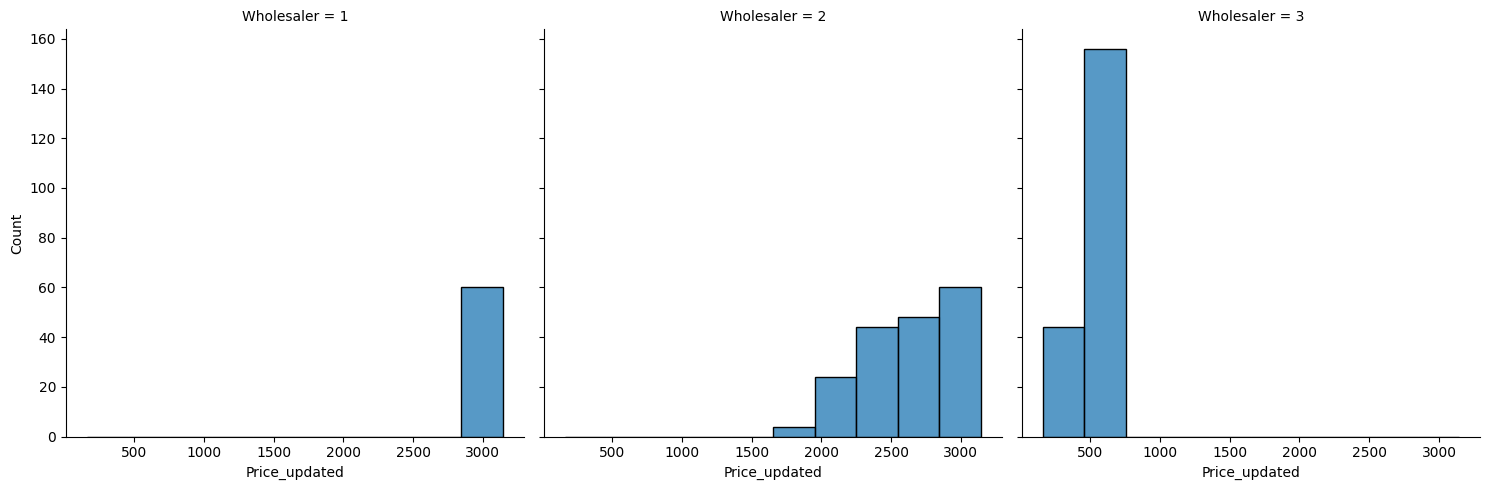

In [16]:
# Histograms of price with 10 bins, split by each Wholesaler
sns.displot(data=dataset_professor_clean,
            x="Price_updated",
            col="Wholesaler",
            bins=10)

# Show the plot
plt.show()

In [17]:
# Calculate the mean of price, grouped by Wholesalers
mean_price_by_age = dataset_professor_clean.groupby("Wholesaler")["Price_updated"].mean()

# Print the result
print(mean_price_by_age)

Wholesaler
1    3043.183333
2    2661.972222
3     468.095000
Name: Price_updated, dtype: float64


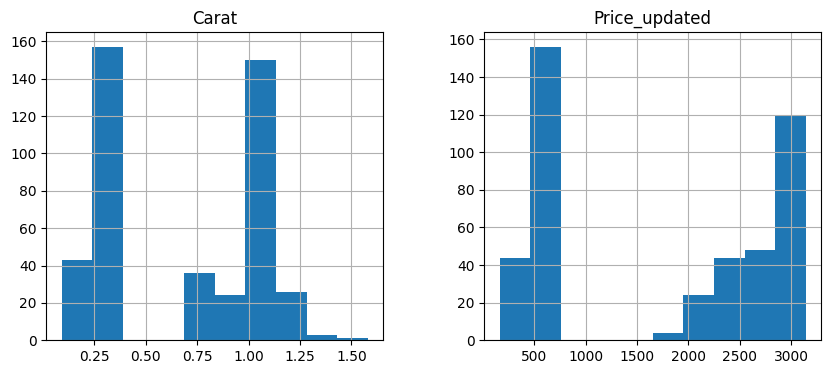

In [18]:
dataset_professor_clean.hist(figsize=(10,4), column=["Carat", "Price_updated"])
plt.show()

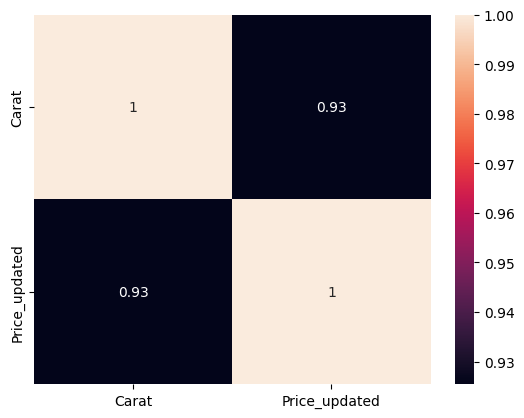

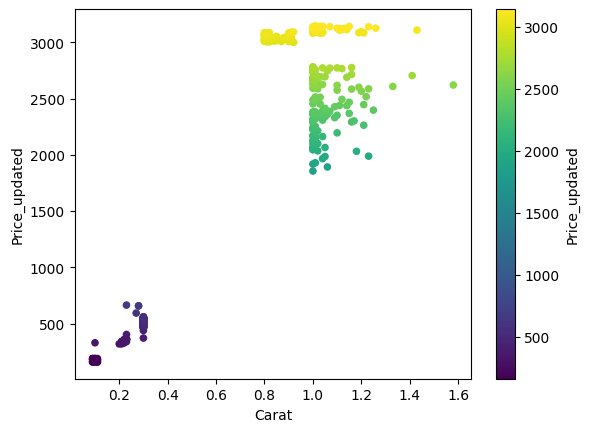

In [19]:
cor = dataset_professor_clean[["Carat","Price_updated"]].corr()
sns.heatmap(cor, annot=True)
plt.show()
dataset_professor_clean[["Carat","Price_updated"]].plot.scatter(x="Carat",y="Price_updated",c="Price_updated", colormap='viridis')
plt.show()
#sns.lmplot(x ="Carat", y ="Price_updated", data = dataset_professor_clean, order = 2, ci = None, scatter_kws={'alpha': 0.5})
#plt.show()

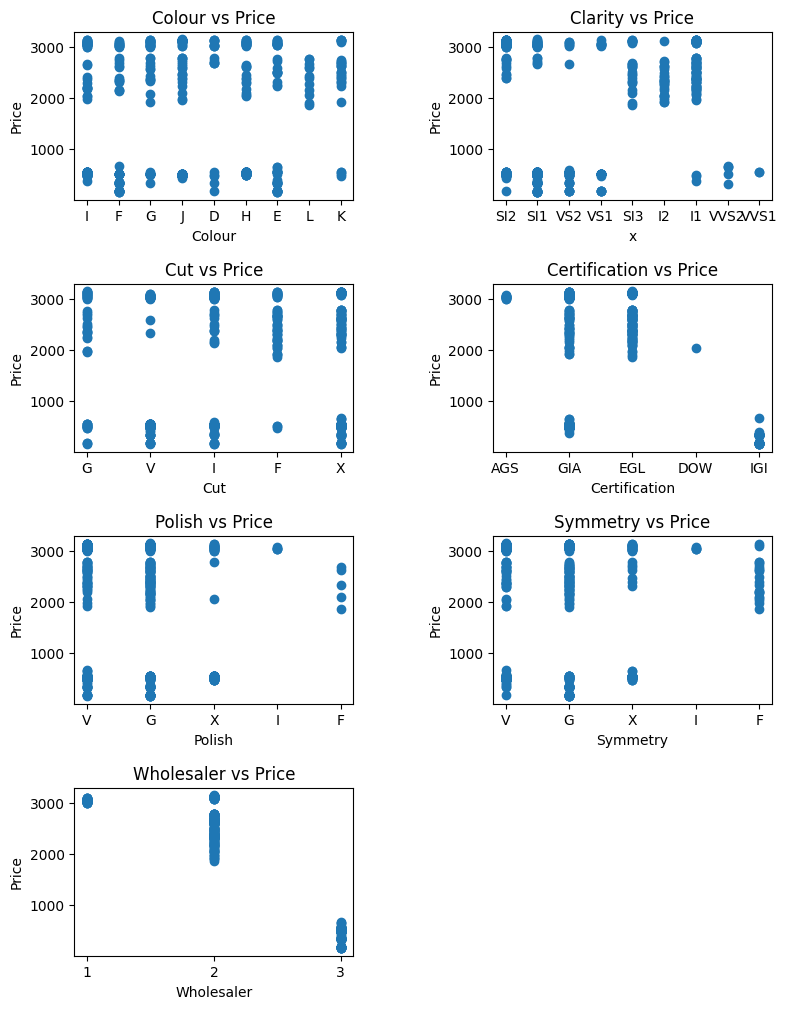

In [20]:
fig = plt.figure(figsize=(9,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)

ax1.set_title('Colour vs Price')
ax1.set_xlabel('Colour')
ax1.set_ylabel('Price')

ax2.set_title('Clarity vs Price')
ax2.set_xlabel('x')
ax2.set_ylabel('Price')

ax3.set_title('Cut vs Price')
ax3.set_xlabel('Cut')
ax3.set_ylabel('Price')

ax4.set_title('Certification vs Price')
ax4.set_xlabel('Certification')
ax4.set_ylabel('Price')

ax5.set_title('Polish vs Price')
ax5.set_xlabel('Polish')
ax5.set_ylabel('Price')

ax6.set_title('Symmetry vs Price')
ax6.set_xlabel('Symmetry')
ax6.set_ylabel('Price')

ax7.set_title('Wholesaler vs Price')
ax7.set_xlabel('Wholesaler')
ax7.set_ylabel('Price')


ax1.scatter(dataset_professor_clean['Colour'],dataset_professor_clean['Price_updated'])
ax2.scatter(dataset_professor_clean['Clarity'],dataset_professor_clean['Price_updated'])
ax3.scatter(dataset_professor_clean['Cut'],dataset_professor_clean['Price_updated'])
ax4.scatter(dataset_professor_clean['Certification'],dataset_professor_clean['Price_updated'])
ax5.scatter(dataset_professor_clean['Polish'],dataset_professor_clean['Price_updated'])
ax6.scatter(dataset_professor_clean['Symmetry'],dataset_professor_clean['Price_updated'])
ax7.scatter(dataset_professor_clean['Wholesaler'],dataset_professor_clean['Price_updated'])
plt.show()

### Feature Engineering

In [21]:
dataset_professor_encoded = dataset_professor_clean.copy()

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [23]:
#Color
Color_column = dataset_professor_encoded[["Colour"]]
#cate_Colors = ["L","K","J","I","H","G","F","E","D"]
cate_Colors = ["D","E","F","G","H","I","J","K","L"]
encoder = OrdinalEncoder(categories=[cate_Colors])
Color_encoded = encoder.fit_transform(Color_column)
dataset_professor_encoded[["Colour"]] = pd.DataFrame(Color_encoded, columns = ['Colour'])

#Clarity
Clarity_column = dataset_professor_encoded[["Clarity"]]
cate_Clarity = ['I1','I2','SI1','SI2','SI3','VS1','VS2','VVS1','VVS2']
encoder = OrdinalEncoder(categories=[cate_Clarity])
Clarity_encoded = encoder.fit_transform(Clarity_column)
dataset_professor_encoded[["Clarity"]] = pd.DataFrame(Clarity_encoded, columns = ['Clarity'])

#Cut
Cut_column = dataset_professor_encoded[["Cut"]]
cate_Cut = ['F', 'G', 'I', 'V', 'X']
encoder = OrdinalEncoder(categories=[cate_Cut])
Cut_encoded = encoder.fit_transform(Cut_column)
dataset_professor_encoded[["Cut"]] = pd.DataFrame(Cut_encoded, columns = ['Cut'])

#Certification
encoder = OneHotEncoder(sparse=False)
Certification_encoded = encoder.fit_transform(dataset_professor_encoded[["Certification"]])
feature_names = encoder.get_feature_names_out(input_features=["Certification"])
Certification_encoded = pd.DataFrame(Certification_encoded, columns=feature_names)

dataset_professor_encoded = dataset_professor_encoded.drop(['Certification'], axis=1)
dataset_professor_encoded = pd.concat([dataset_professor_encoded,Certification_encoded],axis=1)


#Polish
Polish_column = dataset_professor_encoded[["Polish"]]
cate_Polish = ['F', 'G', 'I', 'V', 'X']
encoder = OrdinalEncoder(categories=[cate_Polish])
Polish_encoded = encoder.fit_transform(Polish_column)
dataset_professor_encoded[["Polish"]] = pd.DataFrame(Polish_encoded, columns = ['Polish'])


#Symmetry
Symmetry_column = dataset_professor_encoded[["Symmetry"]]
cate_Symmetry = ['F', 'G', 'I', 'V', 'X']
encoder = OrdinalEncoder(categories=[cate_Symmetry])
Symmetry_encoded = encoder.fit_transform(Symmetry_column)
dataset_professor_encoded[["Symmetry"]] = pd.DataFrame(Symmetry_encoded, columns = ['Symmetry'])

#Wholesaler
encoder = OneHotEncoder(sparse=False)
Wholesaler_encoded = encoder.fit_transform(dataset_professor_encoded[["Wholesaler"]])
feature_names = encoder.get_feature_names_out(input_features=["Wholesaler"])
Wholesaler_encoded = pd.DataFrame(Wholesaler_encoded, columns=feature_names)

dataset_professor_encoded = dataset_professor_encoded.drop(['Wholesaler'], axis=1)
dataset_professor_encoded = pd.concat([dataset_professor_encoded,Wholesaler_encoded],axis=1)

dataset_professor_encoded.head(5)

,Carat,Colour,Clarity,Cut,Polish,Symmetry,Price_updated,Certification_AGS,Certification_DOW,Certification_EGL,Certification_GIA,Certification_IGI,Wholesaler_1,Wholesaler_2,Wholesaler_3
0,0.92,5.0,3.0,1.0,3.0,3.0,3000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.92,5.0,3.0,3.0,1.0,1.0,3000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.82,2.0,3.0,2.0,4.0,4.0,3004.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.81,3.0,2.0,2.0,4.0,3.0,3004.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.90,6.0,6.0,3.0,3.0,3.0,3006.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
dataset_professor_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Carat              440 non-null    float64
 1   Colour             440 non-null    float64
 2   Clarity            440 non-null    float64
 3   Cut                440 non-null    float64
 4   Polish             440 non-null    float64
 5   Symmetry           440 non-null    float64
 6   Price_updated      440 non-null    float64
 7   Certification_AGS  440 non-null    float64
 8   Certification_DOW  440 non-null    float64
 9   Certification_EGL  440 non-null    float64
 10  Certification_GIA  440 non-null    float64
 11  Certification_IGI  440 non-null    float64
 12  Wholesaler_1       440 non-null    float64
 13  Wholesaler_2       440 non-null    float64
 14  Wholesaler_3       440 non-null    float64
dtypes: float64(15)
memory usage: 71.2 KB


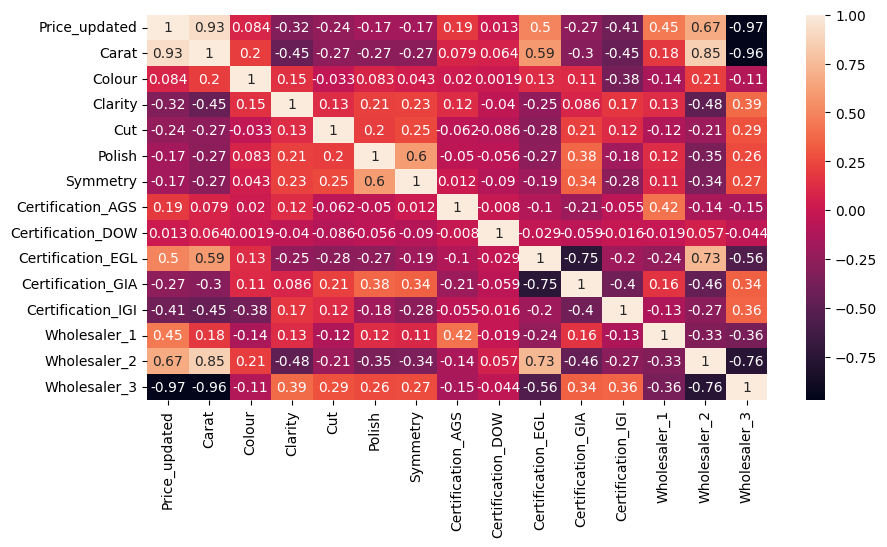

In [25]:
cor = dataset_professor_encoded[["Price_updated","Carat","Colour","Clarity","Cut","Polish","Symmetry","Certification_AGS","Certification_DOW","Certification_EGL","Certification_GIA","Certification_IGI","Wholesaler_1","Wholesaler_2","Wholesaler_3"]].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor, annot=True)
plt.show()


### Linear Regression Model

Split dataset into X and Y variables

In [26]:
Y = dataset_professor_encoded.Price_updated
X = dataset_professor_encoded.drop(['Price_updated'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split

Perform a 75/25 data split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(330, 14) (330,) (110, 14) (110,)


In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Build linear regression

In [30]:
model = linear_model.LinearRegression()

In [31]:
model.fit(X_train, Y_train)

LinearRegression()

Apply trained model to make prediction (on test set)

In [32]:
Y_pred = model.predict(X_test)

### Results

In [33]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [  690.85774722   -35.32948542    37.12630304    26.1769254
    31.49817244    31.62439301   131.88326478  -399.88870701
   197.13396196   121.19773375   -50.32625348   870.35023785
   429.80125153 -1300.15148938]
Intercept: 1258.5687799420925
Mean squared error (MSE): 59269.32
Coefficient of determination (R^2): 0.96


### Building Models with statsmodels ols

In [34]:
# Import the ols function
from statsmodels.formula.api import ols

In [35]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Carat", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     2613.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          1.02e-186
Time:                        19:08:45   Log-Likelihood:                -3307.5
No. Observations:                 440   AIC:                             6619.
Df Residuals:                     438   BIC:                             6627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -200.4836     43.114     -4.650      0.000    -285.221    -115.747
Carat       2864.7325     56.044     51.116      0.000    2754.584    2974.881
==============================================================================
Omnibus:                       11.777   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.229
Skew:                           0.314   Prob(JB):                      0.00134
Kurtosis:                       3.573   Cond. No.                         3.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Colour", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.127
Date:                Sat, 24 Sep 2022   Prob (F-statistic):             0.0777
Time:                        19:08:45   Log-Likelihood:                -3732.9
No. Observations:                 440   AIC:                             7470.
Df Residuals:                     438   BIC:                             7478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1531.1977    118.896     12.879      0.000    1297.521    1764.874
Colour        47.3813     26.795      1.768      0.078      -5.282     100.045
==============================================================================
Omnibus:                     2179.109   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.838
Skew:                          -0.019   Prob(JB):                     1.01e-13
Kurtosis:                       1.194   Cond. No.                         9.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Clarity", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     49.95
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           6.26e-12
Time:                        19:08:45   Log-Likelihood:                -3710.7
No. Observations:                 440   AIC:                             7425.
Df Residuals:                     438   BIC:                             7434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2234.2839     90.494     24.690      0.000    2056.428    2412.140
Clarity     -199.0559     28.166     -7.067      0.000    -254.413    -143.699
==============================================================================
Omnibus:                     6864.032   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.454
Skew:                           0.081   Prob(JB):                     4.46e-09
Kurtosis:                       1.561   Cond. No.                         5.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Cut", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     26.66
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           3.69e-07
Time:                        19:08:45   Log-Likelihood:                -3721.5
No. Observations:                 440   AIC:                             7447.
Df Residuals:                     438   BIC:                             7455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2223.4574    112.244     19.809      0.000    2002.853    2444.062
Cut         -201.2240     38.971     -5.163      0.000    -277.818    -124.630
==============================================================================
Omnibus:                     2757.987   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.125
Skew:                           0.056   Prob(JB):                     2.15e-11
Kurtosis:                       1.367   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Polish", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     13.21
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           0.000312
Time:                        19:08:45   Log-Likelihood:                -3727.9
No. Observations:                 440   AIC:                             7460.
Df Residuals:                     438   BIC:                             7468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2126.3645    125.545     16.937      0.000    1879.619    2373.110
Polish      -174.8161     48.104     -3.634      0.000    -269.360     -80.273
==============================================================================
Omnibus:                     2778.554   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.663
Skew:                          -0.009   Prob(JB):                     2.71e-11
Kurtosis:                       1.371   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Create the model object
mdl_price_vs_carat = ols("Price_updated ~ Symmetry", data=dataset_professor_encoded)

# Fit the model
mdl_price_vs_carat_fit = mdl_price_vs_carat.fit()

# Print the parameters of the fitted model
mdl_price_vs_carat_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Price_updated   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     13.23
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           0.000309
Time:                        19:08:45   Log-Likelihood:                -3727.9
No. Observations:                 440   AIC:                             7460.
Df Residuals:                     438   BIC:                             7468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2096.2476    118.087     17.752      0.000    1864.160    2328.335
Symmetry    -168.8412     46.423     -3.637      0.000    -260.081     -77.601
==============================================================================
Omnibus:                     2797.183   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.455
Skew:                          -0.007   Prob(JB):                     3.01e-11
Kurtosis:                       1.374   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Retraining the models after removing low price diamonds 

In [41]:
dataset_professor_high_price = dataset_professor_encoded.copy()
dataset_professor_high_price.drop(dataset_professor_encoded[dataset_professor_encoded['Price_updated'] < 1000].index, inplace = True)
dataset_professor_high_price.head(30)

,Carat,Colour,Clarity,Cut,Polish,Symmetry,Price_updated,Certification_AGS,Certification_DOW,Certification_EGL,Certification_GIA,Certification_IGI,Wholesaler_1,Wholesaler_2,Wholesaler_3
0,0.92,5.0,3.0,1.0,3.0,3.0,3000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.92,5.0,3.0,3.0,1.0,1.0,3000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.82,2.0,3.0,2.0,4.0,4.0,3004.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.81,3.0,2.0,2.0,4.0,3.0,3004.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.90,6.0,6.0,3.0,3.0,3.0,3006.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.87,2.0,3.0,2.0,1.0,3.0,3007.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.80,0.0,3.0,2.0,3.0,3.0,3008.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.84,2.0,2.0,1.0,3.0,3.0,3010.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.80,0.0,3.0,3.0,3.0,3.0,3012.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.80,0.0,3.0,3.0,3.0,4.0,3012.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [42]:
dataset_professor_high_price.shape

(240, 15)

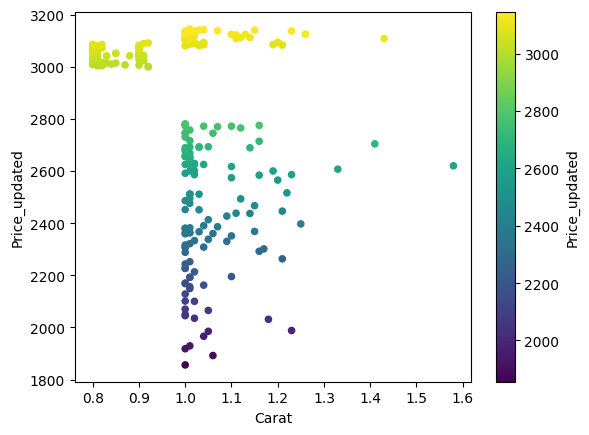

In [43]:
dataset_professor_high_price[["Carat","Price_updated"]].plot.scatter(x="Carat",y="Price_updated",c="Price_updated", colormap='viridis')
plt.show()

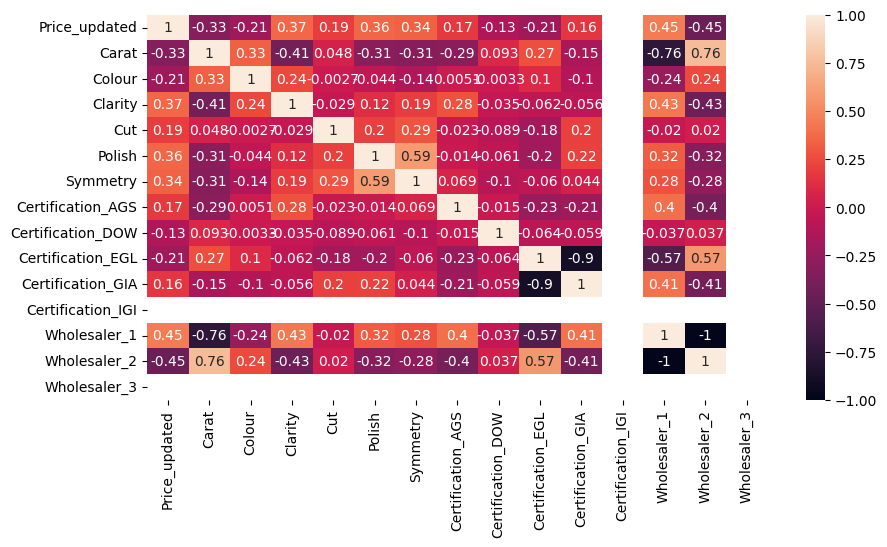

In [44]:
cor = dataset_professor_high_price[["Price_updated","Carat","Colour","Clarity","Cut","Polish","Symmetry","Certification_AGS","Certification_DOW","Certification_EGL","Certification_GIA","Certification_IGI","Wholesaler_1","Wholesaler_2","Wholesaler_3"]].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor, annot=True)
plt.show()

In [45]:
Y_New = dataset_professor_high_price.Price_updated
X_New = dataset_professor_high_price.drop(['Price_updated'], axis=1)

In [46]:
X_train_New, X_test_New, Y_train_New, Y_test_New = train_test_split(X_New, Y_New, test_size=0.25)
print(X_train_New.shape, Y_train_New.shape, X_test_New.shape, Y_test_New.shape)

(180, 14) (180,) (60, 14) (60,)


In [47]:
model_New = linear_model.LinearRegression()

In [48]:
model_New.fit(X_train_New, Y_train_New)

LinearRegression()

In [49]:
Y_pred_New = model_New.predict(X_test_New)

In [50]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test_New, Y_pred_New))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test_New, Y_pred_New))

Coefficients: [  690.85774722   -35.32948542    37.12630304    26.1769254
    31.49817244    31.62439301   131.88326478  -399.88870701
   197.13396196   121.19773375   -50.32625348   870.35023785
   429.80125153 -1300.15148938]
Intercept: 1258.5687799420925
Mean squared error (MSE): 95146.74
Coefficient of determination (R^2): 0.11


### Predicting professor's dimond ring price

In [51]:
professors_ring = pd.DataFrame().reindex_like(dataset_professor_high_price)
professors_ring.dropna(subset = ["Carat"], inplace=True)
#professors_ring.isna().sum()

In [52]:
professors_ring = professors_ring.append(pd.DataFrame({"Carat": [0.9],"Colour": [6.0],"Clarity": [3.0],"Cut": [3.0],"Polish": [1.0],"Symmetry": [3.0],"Certification_AGS": [0.0],"Certification_DOW": [0.0],"Certification_EGL": [0.0],"Certification_GIA": [1.0],"Certification_IGI": [0.0],"Wholesaler_1": [1.0],"Wholesaler_2": [0.0],"Wholesaler_3": [0.0]}))


In [53]:
professors_ring=professors_ring.drop(['Price_updated'], axis=1)
professors_ring

,Carat,Colour,Clarity,Cut,Polish,Symmetry,Certification_AGS,Certification_DOW,Certification_EGL,Certification_GIA,Certification_IGI,Wholesaler_1,Wholesaler_2,Wholesaler_3
0,0.9,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [54]:
Y_pred_Prof = model_New.predict(professors_ring)
print(Y_pred_Prof)
Y_pred_Prof = model.predict(professors_ring)
print(Y_pred_Prof)

[2914.47975265]
[2976.19284831]


Based on the analysis it can be concluded that the previous model(with whole dataset) predictis the price of professor's ring better when he buys it from the wholeseller 1. It seems like professor's ring costed him more than the model predicted. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cedfd35-f7a7-4cb1-b381-fa8608f1c5bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>